In [ ]:
#Data Sources

import numpy as np
import pandas as pd
import yfinance as yf

df = yf.download('AAPL', start = '1980-01-01', end = '2022-04-11')

df['Ret'] = df['Adj Close'].pct_change()
df.reset_index(inplace = True)

name = 'Ret'

df.tail(2)

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,Ret
10418,2022-04-07,171.160004,173.360001,169.850006,172.139999,170.867172,77594700,0.001804
10419,2022-04-08,171.779999,171.779999,169.199997,170.089996,168.832321,76575500,-0.011909


In [ ]:
#Input and Output

df['Ret25_i'] = df[name].rolling(25).apply(lambda x: 100 * (np.prod(1 + x / 100) - 1))
df['Ret60_i'] = df[name].rolling(60).apply(lambda x: 100 * (np.prod(1 + x / 100) - 1))
df['Ret90_i'] = df[name].rolling(90).apply(lambda x: 100 * (np.prod(1 + x / 100) - 1))
df['Ret120_i'] = df[name].rolling(120).apply(lambda x: 100 * (np.prod(1 + x / 100) - 1))
df['Ret240_i'] = df[name].rolling(240).apply(lambda x: 100 * (np.prod(1 + x / 100) - 1))

del df['Open']
del df['Close']
del df['High']
del df['Low']
del df['Volume']
del df['Adj Close']

df = df.dropna()
df.tail(10)

,Date,Ret,Ret25_i,Ret60_i,Ret90_i,Ret120_i,Ret240_i
10410,2022-03-28,0.005037,0.053177,-0.002813,0.168500,0.239295,0.300388
10411,2022-03-29,0.019134,0.090149,0.019857,0.171149,0.252152,0.322116
10412,2022-03-30,-0.006649,0.109387,-0.011795,0.135913,0.236380,0.310361
10413,2022-03-31,-0.017776,0.074898,-0.016879,0.101120,0.221290,0.305399
10414,2022-04-01,-0.001718,0.060206,0.008005,0.096470,0.220199,0.300737
10415,2022-04-04,0.023693,0.082274,0.048402,0.117761,0.253071,0.336226
10416,2022-04-05,-0.018942,0.074953,0.028462,0.095510,0.238331,0.299128
10417,2022-04-06,-0.018451,0.035893,0.009890,0.108755,0.199570,0.277636
10418,2022-04-07,0.001804,0.039680,-0.005089,0.088668,0.193851,0.281901
10419,2022-04-08,-0.011909,0.046183,-0.019567,0.045156,0.170093,0.276003


In [ ]:
df['Ret25'] = df['Ret25_i'].shift(-25)
df = df.dropna()
df.tail(10)

<ipython-input-22-3a9ec3ee711b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ret25'] = df['Ret25_i'].shift(-25)


,Date,Ret,Ret25_i,Ret60_i,Ret90_i,Ret120_i,Ret240_i,Ret25
10385,2022-02-18,-0.009356,-0.022875,0.047863,0.183078,0.106527,0.365183,0.053177
10386,2022-02-22,-0.017812,-0.045791,0.026758,0.169481,0.097128,0.330748,0.090149
10387,2022-02-23,-0.025864,-0.052760,0.032575,0.123322,0.066757,0.312448,0.109387
10388,2022-02-24,0.016680,-0.015067,0.027381,0.132500,0.075968,0.304649,0.074898
10389,2022-02-25,0.012965,0.008245,0.008770,0.133661,0.084709,0.304872,0.060206
10390,2022-02-28,0.001638,0.022651,0.013615,0.120203,0.070848,0.312985,0.082274
10391,2022-03-01,-0.011628,0.015885,0.008115,0.105196,0.069303,0.335340,0.074953
10392,2022-03-02,0.020588,0.047867,0.040434,0.124330,0.096617,0.360494,0.035893
10393,2022-03-03,-0.001981,0.046448,0.016946,0.127638,0.127778,0.330076,0.039680
10394,2022-03-04,-0.018408,0.030975,-0.036899,0.109543,0.105448,0.318518,0.046183


In [ ]:
df.describe()

,Ret,Ret25_i,Ret60_i,Ret90_i,Ret120_i,Ret240_i,Ret25
count,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000
mean,0.001179,0.029462,0.071034,0.105704,0.139633,0.275002,0.029319
std,0.028211,0.141522,0.226865,0.279763,0.321760,0.447824,0.141492
min,-0.518692,-0.940299,-1.151643,-1.040123,-1.048317,-0.902590,-0.940299
25%,-0.012822,-0.048475,-0.048462,-0.046201,-0.044289,-0.049322,-0.048640
50%,0.000000,0.035281,0.084316,0.120979,0.158937,0.295034,0.035281
75%,0.014589,0.115271,0.211587,0.265631,0.315653,0.567630,0.114891
max,0.332279,0.882471,0.892261,1.141606,1.301160,1.782617,0.882471


In [ ]:
ts = int(0.4 * len(df))
split_time = len(df) - ts
test_time = df.iloc[split_time: , 0:1].values
Ret_vector = df.iloc[split_time: , 1:2].values
ts

4062

In [ ]:
from sklearn.model_selection import train_test_split
Xdf, ydf = df.iloc[:, 2:-1], df.iloc[:, -1]
X = Xdf.astype('float32')
y = ydf.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = ts, shuffle = False
) #It is important to keep 'shuffle = False'
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(6093, 5) (4062, 5) (6093,) (4062,)


In [ ]:
!pip -q install keras_tuner

In [ ]:
import keras_tuner as kt
import tensorflow as tf
from keras_tuner import HyperModel

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(1234)
val_split = 0.2

In [ ]:
class MLP_model(HyperModel):
    def build(self, hp):
        # We define a constant activation function of ReLU form. We will not be tuning the activation functions
        act_fun = 'relu'

        #We do ask the Kears Tuner to choose whether is best to have a dropout rate after each hidden layer of 0.2 or 0.3
        n_dropout = hp.Choice('n_dropout', values = [0.20, 0.30])

        model = tf.keras.models.Sequential()

        for i in range(1, hp.Int('num_layers', 1, 5)):
            model.add(
                tf.keras.layers.Dense(
                    units = hp.Int(
                        'units_dense_' + str(i), min_value = 1, max_value = 25, step = 5
                    ),
                    activation = act_fun,
                )
            )
            model.add(tf.keras.layers.Dropout(n_dropout))

        model.add(tf.keras.layers.Dense(units = 1))

        hp_lr = 1e-5
        adam = tf.keras.optimizers.Adam(learning_rate = hp_lr)
        model.compile(optimizer = adam, loss = 'mean_absolute_error')

        return model

In [ ]:
import os
from keras import backend as k

k.clear_session()

hypermodel = MLP_model()
tuner = kt.Hyperband(
    hypermodel,
    objective = kt.Objective('val_loss', direction = 'min'),
    overwrite = True,
    max_epochs = 30,
    seed = 1234,
    directory = os.path.normpath("/content/")
)
tuner.search(X_train, y_train, validation_split = val_split)
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

Trial 90 Complete [00h 00m 42s]
val_loss: 0.10418667644262314

Best val_loss So Far: 0.09929023683071136
Total elapsed time: 00h 12m 22s


In [ ]:
best_hps.values

{'n_dropout': 0.3,
 'num_layers': 3,
 'units_dense_1': 11,
 'units_dense_2': 6,
 'units_dense_3': 21,
 'units_dense_4': 1,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 3,
 'tuner/round': 0}

In [ ]:
model = tuner.hypermodel.build(best_hps)
es = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20, restore_best_weights= True
)

model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    epochs = 500,
    batch_size = 32,
    verbose = 2,
    callbacks = [es],
)

Epoch 1/500
153/153 - 3s - loss: 0.3041 - val_loss: 0.3216 - 3s/epoch - 17ms/step
Epoch 2/500
153/153 - 1s - loss: 0.2964 - val_loss: 0.3101 - 799ms/epoch - 5ms/step
Epoch 3/500
153/153 - 1s - loss: 0.2868 - val_loss: 0.2992 - 659ms/epoch - 4ms/step
Epoch 4/500
153/153 - 0s - loss: 0.2851 - val_loss: 0.2887 - 495ms/epoch - 3ms/step
Epoch 5/500
153/153 - 0s - loss: 0.2749 - val_loss: 0.2785 - 470ms/epoch - 3ms/step
Epoch 6/500
153/153 - 1s - loss: 0.2722 - val_loss: 0.2690 - 577ms/epoch - 4ms/step
Epoch 7/500
153/153 - 0s - loss: 0.2648 - val_loss: 0.2594 - 480ms/epoch - 3ms/step
Epoch 8/500
153/153 - 1s - loss: 0.2623 - val_loss: 0.2501 - 518ms/epoch - 3ms/step
Epoch 9/500
153/153 - 0s - loss: 0.2623 - val_loss: 0.2407 - 493ms/epoch - 3ms/step
Epoch 10/500
153/153 - 1s - loss: 0.2556 - val_loss: 0.2318 - 583ms/epoch - 4ms/step
Epoch 11/500
153/153 - 1s - loss: 0.2481 - val_loss: 0.2236 - 843ms/epoch - 6ms/step
Epoch 12/500
153/153 - 1s - loss: 0.2407 - val_loss: 0.2161 - 855ms/epoch - 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                66        
                                                                 
 dropout_3 (Dropout)         (None, 11)                0         
                                                                 
 dense_5 (Dense)             (None, 6)                 72        
                                                                 
 dropout_4 (Dropout)         (None, 6)                 0         
                                                                 
 dense_6 (Dense)             (None, 1)                 7         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = model.predict(X_test)

127/127 [==============================] - 0s 2ms/step


In [ ]:
df_predictions = pd.DataFrame(
    {
        'Date': test_time.flatten(),
        'Pred': y_pred.flatten(),
        'Ret': (Ret_vector.flatten()),
    }
)
df_predictions.tail()

,Date,Pred,Ret
4057,2022-02-28,0.020470,0.001638
4058,2022-03-01,0.020428,-0.011628
4059,2022-03-02,0.020383,0.020588
4060,2022-03-03,0.020276,-0.001981
4061,2022-03-04,0.020364,-0.018408


In [ ]:
df_predictions.Date = pd.to_datetime(df_predictions.Date, format="%YYYY-%mm-%dd")
df = df_predictions
df.tail()

,Date,Pred,Ret
4057,2022-02-28,0.020470,0.001638
4058,2022-03-01,0.020428,-0.011628
4059,2022-03-02,0.020383,0.020588
4060,2022-03-03,0.020276,-0.001981
4061,2022-03-04,0.020364,-0.018408


In [ ]:
df["Positions"] = np.where(df["Pred"] > 0, 1, -1)
df["Strat_ret"] = df["Positions"].shift(1) * df["Ret"]
df["Positions_L"] = df["Positions"].shift(1)
df["Positions_L"][df["Positions_L"] == -1] = 0
df["Strat_ret_L"] = df["Positions_L"] * df["Ret"]
df["CumRet"] = df["Strat_ret"].expanding().apply(lambda x: np.prod(1 + x) - 1)
df["CumRet_L"] = df["Strat_ret_L"].expanding().apply(lambda x: np.prod(1 + x) - 1)
df["bhRet"] = df["Ret"].expanding().apply(lambda x: np.prod(1 + x) - 1)

Final_Return_L = np.prod(1 + df["Strat_ret_L"]) - 1
Final_Return = np.prod(1 + df["Strat_ret"]) - 1
Buy_Return = np.prod(1 + df["Ret"]) - 1

print("Strat Return Long Only =", Final_Return_L * 100, "%")
print("Strat Return =", Final_Return * 100, "%")
print("Buy and Hold Return =", Buy_Return * 100, "%")

<ipython-input-37-c91a31ad190e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Positions_L"][df["Positions_L"] == -1] = 0


Strat Return Long Only = 6198.696291095729 %
Strat Return = 6198.696291095729 %
Buy and Hold Return = 6133.936522362812 %


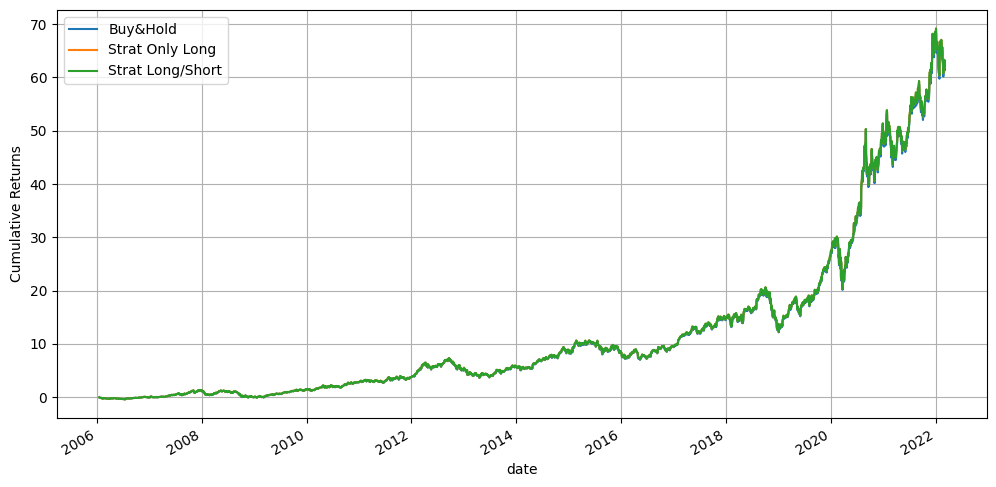

,Pred,Ret,Positions,Strat_ret,Positions_L,Strat_ret_L,CumRet,CumRet_L,bhRet
count,4062.000000,4062.000000,4062.0,4061.000000,4061.0,4061.000000,4061.000000,4061.000000,4062.000000
mean,0.020614,0.001227,1.0,0.001230,1.0,0.001230,11.802454,11.802454,11.667950
std,0.000729,0.020451,0.0,0.020452,0.0,0.020452,15.246044,15.246044,15.088548
min,0.015217,-0.179195,1.0,-0.179195,1.0,-0.179195,-0.401842,-0.401842,-0.407992
25%,0.020143,-0.008263,1.0,-0.008246,1.0,-0.008246,1.439263,1.439263,1.408313
50%,0.020423,0.000942,1.0,0.000944,1.0,0.000944,6.312930,6.312930,6.232786
75%,0.020851,0.011655,1.0,0.011658,1.0,0.011658,14.739436,14.739436,14.574343
max,0.037364,0.139050,1.0,0.139050,1.0,0.139050,69.170195,69.170195,68.448743


In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
ax = plt.gca()
df.plot(x="Date", y="bhRet", label="Buy&Hold", ax=ax)
df.plot(x="Date", y="CumRet_L", label="Strat Only Long", ax=ax)
df.plot(x="Date", y="CumRet", label="Strat Long/Short", ax=ax)
plt.xlabel("date")
plt.ylabel("Cumulative Returns")
plt.grid()
plt.show()

df.describe()